Epoch[0]: Average Loss: 1.6718714359035547; Max Loss: 2.685546875; Min Loss: 1.041015625; Trained in 8551 seconds


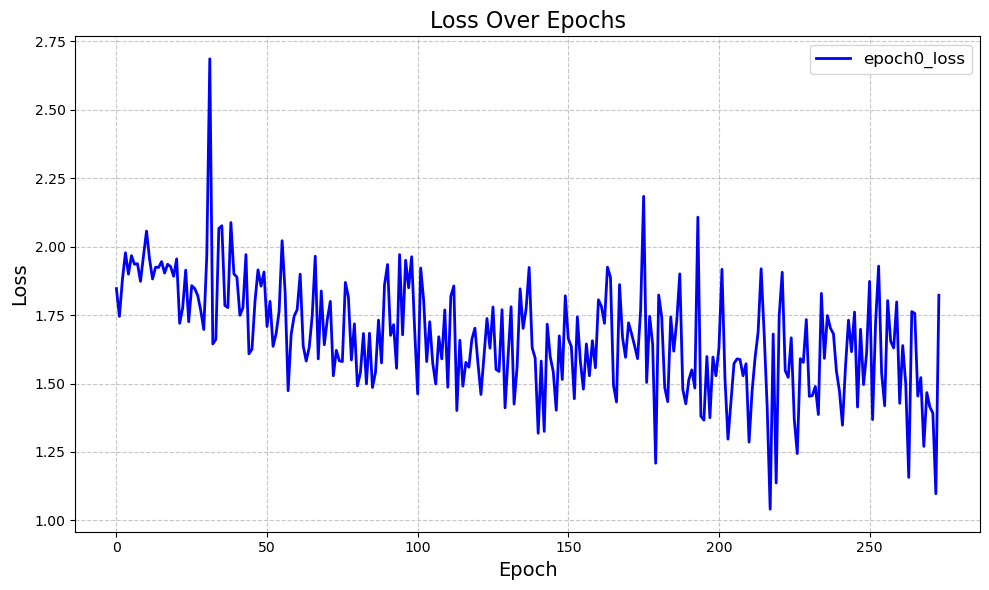

Plot saved to epoch0_loss.txt
Epoch[1]: Average Loss: 1.3872426722171534; Max Loss: 2.1484375; Min Loss: 0.92529296875; Trained in 8565 seconds


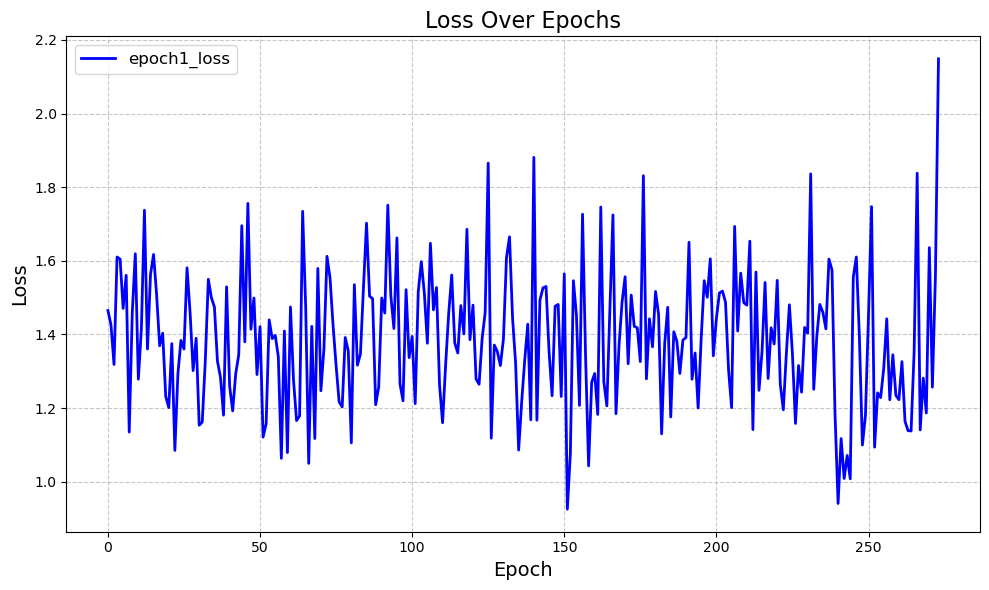

Plot saved to epoch1_loss.txt


In [ ]:
import re
import matplotlib.pyplot as plt
import os

def calculate_statistics(file_path):
    try:
        with open(file_path, 'r') as file:
            losses = []
 
            total_time_seconds = 0
            for i, line in enumerate(file):
                if i == 0:
                    match = re.search(r'(\d+):(\d+):(\d+)<([\d.]+):[\d]+, ([\d.]+)s/it', line)
                    if match:
                        hours = int(match.group(1))
                        minutes = int(match.group(2))
                        seconds = int(match.group(3))
                        total_time_seconds = hours * 3600 + minutes * 60 + seconds  # Convert to seconds
                        time_per_epoch = float(match.group(5))  # Time per epoch in seconds
                    else:
                        print("The first line does not contain the expected format.")
                        return None, None

                # Extract the number after "Loss:"
                if "Loss:" in line:
                    try:
                        loss = float(line.split("Loss:")[1].strip())
                        losses.append(loss)
                    except ValueError:
                        print(f"Invalid loss value in line: {line.strip()}")
            
            if not losses:
                print("No valid loss values found in the file.")
                return None
            
            average_loss = sum(losses) / len(losses)
            return average_loss, max(losses), min(losses), losses, total_time_seconds
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
        return None

def plot_loss_and_save(losses, path):
    """
    Plots the loss values over epochs.
    
    Parameters:
    - losses: List of loss values.
    """
    if not losses:
        print("Loss list is empty. Please provide valid loss values.")
        return

    base_name = os.path.splitext(path)[0]
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label=base_name, color='blue', linewidth=2)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Loss Over Epochs', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    try:
        plt.savefig(path, format='png', dpi=300)
        print(f"Plot saved to {path}")
    except Exception as e:
        print(f"Failed to save plot: {e}")
    finally:
        plt.close()



# Example usage
file_paths = ['epoch0_loss.txt', 'epoch1_loss.txt']

for i, file_path in enumerate(file_paths):
    average_loss, max_losses, min_losses, losses, total_time = calculate_statistics(file_path)
    
    if average_loss is not None:
        print(f"Epoch[{i}]: Average Loss: {average_loss}; Max Loss: {max_losses}; Min Loss: {min_losses}; Trained in {total_time} seconds")
    plot_file_path = file_path.replace('.txt', '.png')
    plot_loss_and_save(losses, plot_file_path)
